## IMPORTING REQUIRED LIBRARIES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## UPLOAD THE DATASET

In [3]:
#load the data 
walmart_data = pd.read_csv('Walmart.csv')

## EXPLORING THE DATA

In [4]:
#get the first five rows of the data
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
#get the number of rows and columns 
walmart_data.shape

(6435, 8)

In [6]:
# summary of data
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
# convert the Date column from string type to datetime type
walmart_data['Date'] = pd.to_datetime(walmart_data['Date'], format='%d-%m-%Y')

In [8]:
# check if the conversion is done for Date column
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [9]:
# check for any missing values
walmart_data.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [10]:
# count the unique values in each column
walmart_data.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [11]:
# get deccribtive summary statistic 
walmart_data.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


## COLUMNS CORRLATIONS

<Axes: >

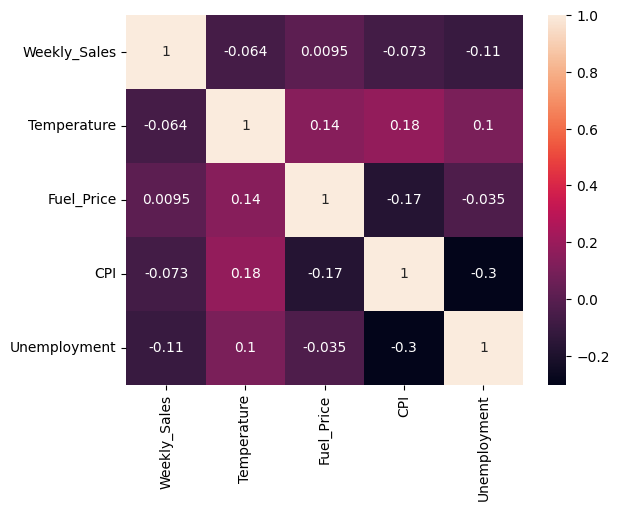

In [12]:
# check the corrlation between columns
sub_data = walmart_data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()
sns.heatmap(sub_data, annot=True)

## SALES PER STORES

In [13]:
# group the data by store and get weekly sales in each store
sales_per_store = walmart_data.groupby('Store')['Weekly_Sales'].sum().reset_index()
sales_per_store.head()

,Store,Weekly_Sales
0,1,2.224028e+08
1,2,2.753824e+08
2,3,5.758674e+07
3,4,2.995440e+08
4,5,4.547569e+07


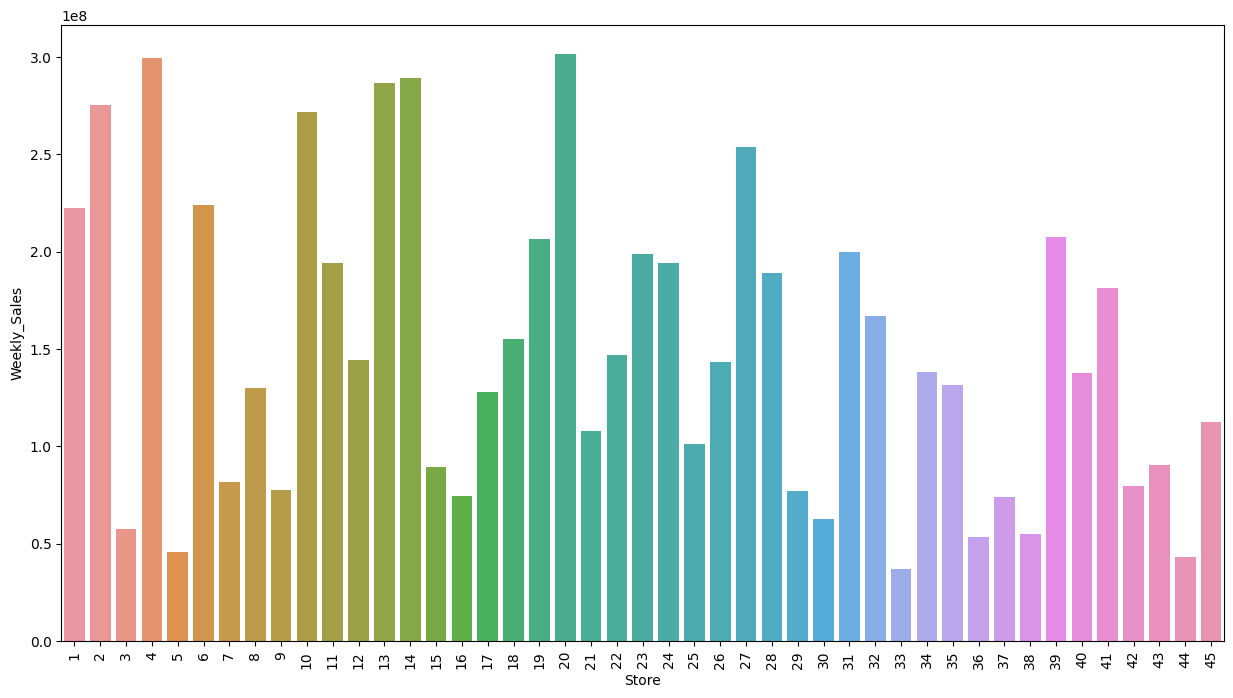

In [14]:
# plot the sales in each stores
plt.figure(figsize=(15,8))
sns.barplot(sales_per_store, x='Store',  y='Weekly_Sales')
plt.xticks(rotation=90)
plt.show()

## MOST SELING STORES

In [15]:
# get the most 10 selling stores 
sales_per_stores = walmart_data.groupby('Store')['Weekly_Sales'].sum().to_frame().sort_values('Weekly_Sales', ascending=False)
sales_per_stores = pd.DataFrame(sales_per_stores).reset_index()
sales_per_stores.head(10)

,Store,Weekly_Sales
0,20,3.013978e+08
1,4,2.995440e+08
2,14,2.889999e+08
3,13,2.865177e+08
4,2,2.753824e+08
5,10,2.716177e+08
6,27,2.538559e+08
7,6,2.237561e+08
8,1,2.224028e+08
9,39,2.074455e+08


## LOWEST SELLING STORES

In [16]:
# get the lowest 10 selling stores
sales_per_stores.tail(10)

,Store,Weekly_Sales
35,29,77141554.31
36,16,74252425.40
37,37,74202740.32
38,30,62716885.12
39,3,57586735.07
40,38,55159626.42
41,36,53412214.97
42,5,45475688.90
43,44,43293087.84
44,33,37160221.96


## SALES TREND PER MONTHS

In [17]:
# add a new column to dataset contain the month and year of the Date column
walmart_data['month_year'] = walmart_data['Date'].apply(lambda x: x.strftime('%m-%Y'))
walmart_data['year'] = walmart_data.Date.dt.year        

In [18]:
# group the data py month_year column
sales_trend = walmart_data.groupby(['year', 'month_year'])['Weekly_Sales'].sum().reset_index()

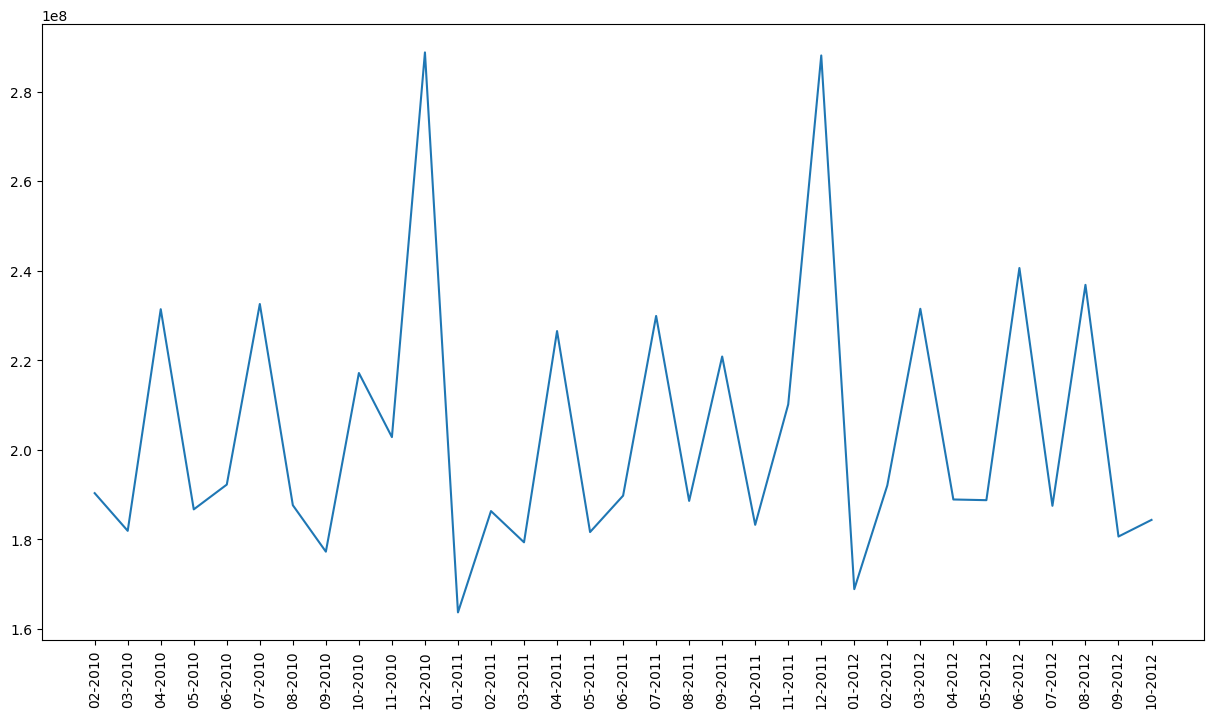

In [19]:
# plot the trend of sales per month
plt.figure(figsize=(15,8))
plt.plot(sales_trend['month_year'],  sales_trend['Weekly_Sales'])
plt.xticks(rotation=90)
plt.show()

## HOLIDAY WEEK SALES VS Non-HOLIDAY WEEK SALES

In [20]:
# convert (1,0) in Holiday_Flag column to more readable values
Holiday_Flag = {1:'Holiday week', 0:'Non-holiday week'}
walmart_data['Holiday_Flag'] = walmart_data['Holiday_Flag'].map(Holiday_Flag)

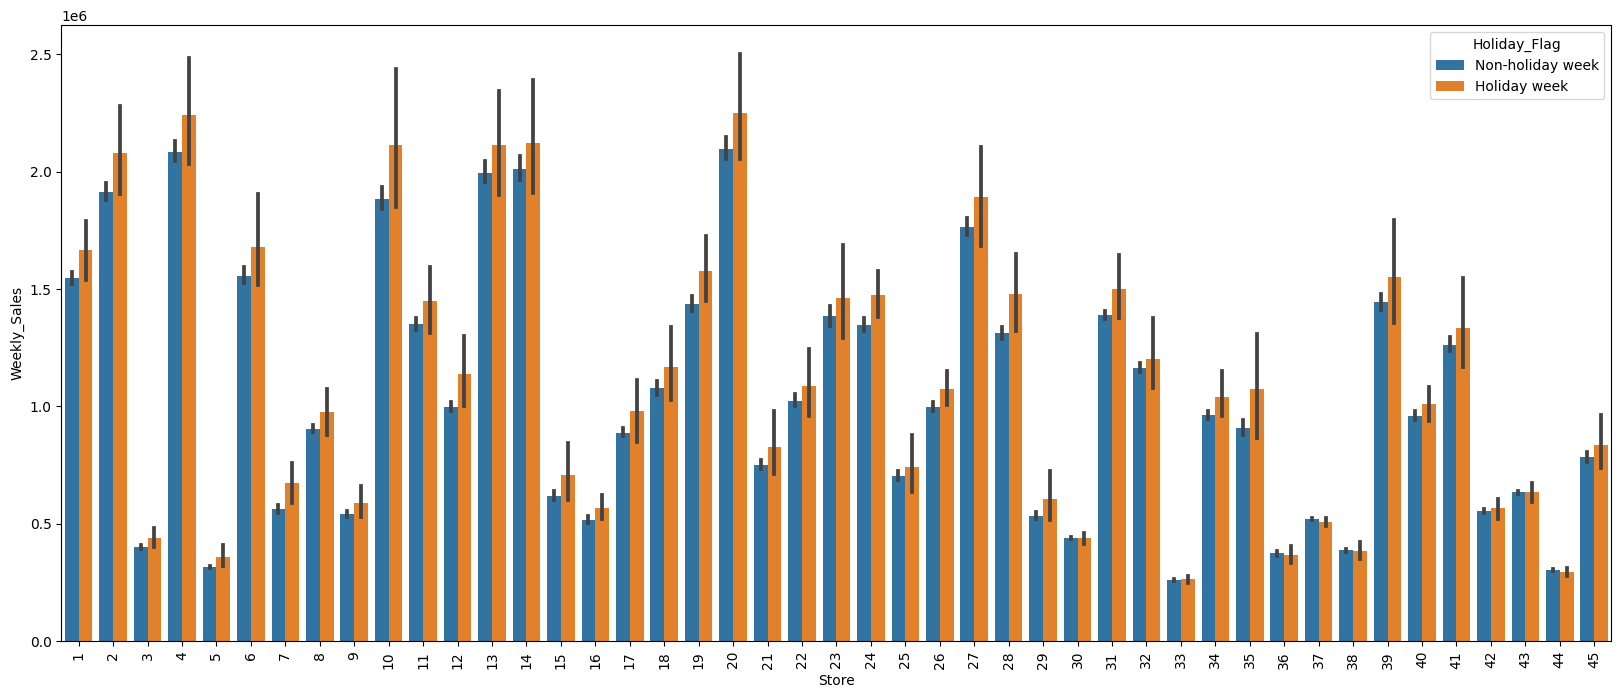

In [21]:
# plote sales in holiday and non holiday per stores 
plt.figure(figsize=(20,8))
sns.barplot(walmart_data, x='Store', y='Weekly_Sales', hue='Holiday_Flag')
plt.xticks(rotation=90)
plt.show()

## TREND OF SALES OVER EACH YEAR IN DATASET

In [22]:
# extrac month from date column
walmart_data['month'] = walmart_data.Date.dt.month  

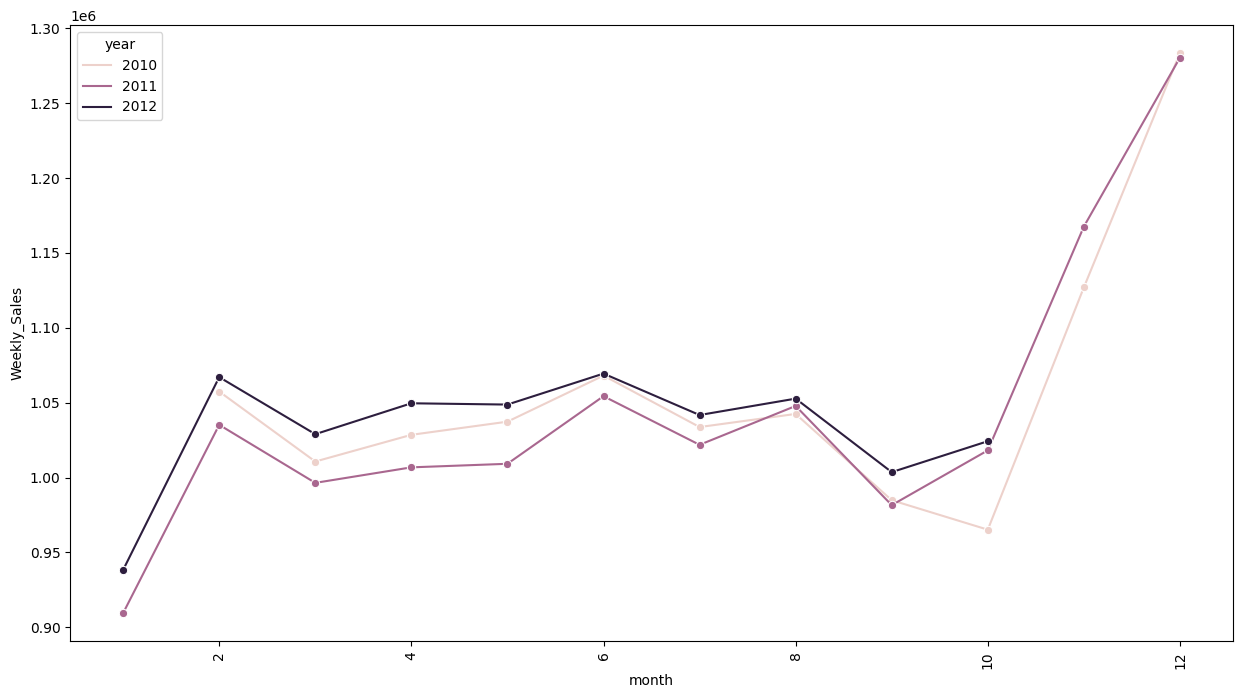

In [23]:
# plot trend of sales over each year in data set
plt.figure(figsize=(15,8))
sns.lineplot(data=walmart_data, x='month', y='Weekly_Sales', hue='year', marker='o', errorbar=None)
plt.xticks(rotation=90)
plt.show()

## SALES PER MONTH IN EACH YEAR OVER DATASET

In [24]:
monthly_sales_per_year = walmart_data.groupby([ 'year', 'month'])['Weekly_Sales'].sum().reset_index()
monthly_sales_per_year

,year,month,Weekly_Sales
0,2010,2,1.903330e+08
1,2010,3,1.819198e+08
2,2010,4,2.314124e+08
3,2010,5,1.867109e+08
4,2010,6,1.922462e+08
5,2010,7,2.325801e+08
6,2010,8,1.876401e+08
7,2010,9,1.772679e+08
8,2010,10,2.171618e+08
9,2010,11,2.028534e+08


## MONTHLY SALES OVER ALL 3 YEARS IN DATASET

In [32]:
monthly_sales_over_3years = walmart_data.groupby('month')['Weekly_Sales'].sum().reset_index()
monthly_sales_over_3years

,month,Weekly_Sales
0,1,3.325984e+08
1,2,5.687279e+08
2,3,5.927859e+08
3,4,6.468598e+08
4,5,5.571256e+08
5,6,6.226299e+08
6,7,6.500010e+08
7,8,6.130902e+08
8,9,5.787612e+08
9,10,5.847848e+08


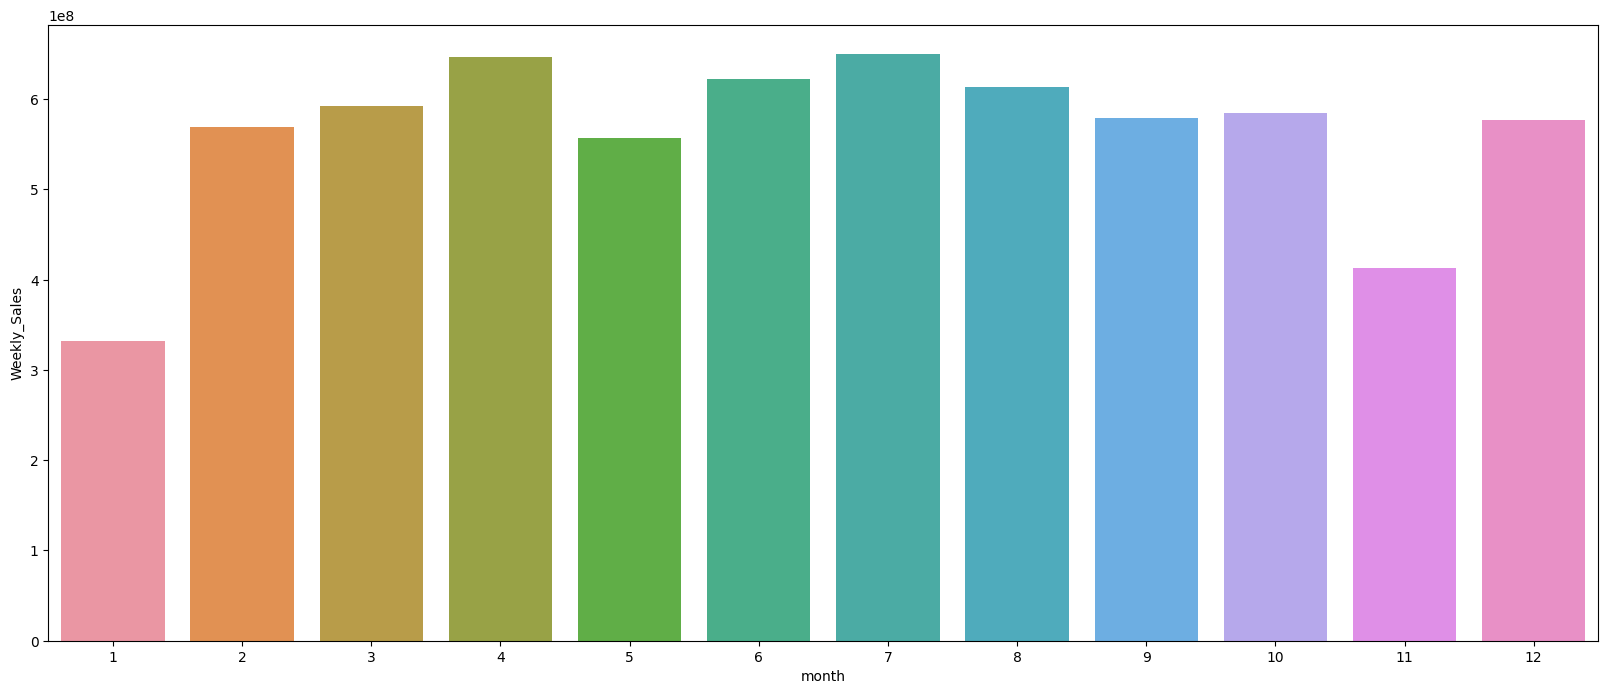

In [27]:
# plot monthly_sales_over_3years
plt.figure(figsize=(20,8))
sns.barplot(monthly_sales_over_3years, x='month', y='Weekly_Sales')
plt.show()

## THE MOST 5 SELLING STORES IN EACH YEAR

In [33]:
# the most 5 selling stores in 2010
sales_2010 = walmart_data[walmart_data['year'] == 2010]
sales_2010.groupby('Store')['Weekly_Sales'].sum().reset_index().sort_values('Weekly_Sales', ascending=False).head()

,Store,Weekly_Sales
13,14,1.054622e+08
19,20,1.017331e+08
3,4,9.568047e+07
1,2,9.527786e+07
12,13,9.527274e+07


In [29]:
# the most 5 selling stores in 2011
sales_2011 = walmart_data[walmart_data['year'] == 2011]
sales_2011.groupby('Store')['Weekly_Sales'].sum().reset_index().sort_values('Weekly_Sales', ascending=False).head()

,Store,Weekly_Sales
3,4,1.110923e+08
19,20,1.098370e+08
13,14,1.060963e+08
12,13,1.045375e+08
9,10,9.891689e+07


In [30]:
# the most 5 selling stores in 2012
sales_2012 = walmart_data[walmart_data['year'] == 2012]
sales_2012.groupby('Store')['Weekly_Sales'].sum().reset_index().sort_values('Weekly_Sales', ascending=False).head()

,Store,Weekly_Sales
3,4,92771189.24
19,20,89827709.38
12,13,86707455.02
1,2,81496695.37
9,10,78228616.94
